# Magnificent Seven ETF Analysis

### Spring 2024 Data Science Project
### By: Dhruv Dewan, Anish Nandyala, Adithya Prashanth

### Introduction

In today's fast-paced financial environment, navigating the stock market's continuously changing waves can feel like high-stakes gambling. With fortunes climbing and falling in a split second, investors constantly seek the keys to predictability and profitability. The concept of Exchange-Traded Funds (ETFs) has provided a diversified avenue for investment, offering exposure to a basket of assets within a single fund. Among these, the Magnificent Seven ETF (from Roundhill Investments) stands out, comprising seven tech giants: Apple, Amazon, Meta (formerly Facebook), Alphabet (Google), Tesla, Nvidia, and Microsoft. It is well known that tech stocks in general are very volatile and prone to great change. With the risk that this volatility brings, it accompanies great potential for profit as well. That is what our motivation for this project stems from.

Our project aims to harness the power of machine learning to discover the hidden features of stock prediction. At its core, we aim to address a fundamental question: Can we leverage historical stock data, technical indicators, and other features to forecast the future performance of the Magnificent Seven ETF with machine learning?

In a market where volatility rules the market, the ability to anticipate price movements with a degree of accuracy holds great value. Successful predictions empower investors to make informed decisions, mitigate risks, and capitalize on opportunities for profit. Furthermore, in the realm of ETFs, where the fortunes of multiple companies are intertwined, the stakes are even higher, and the potential rewards even more enticing. To achieve our goal, we will dive into the realm of technical analysis, a cornerstone of financial forecasting. By identifying and utilizing key technical indicators, widely recognized in the finance industry, we aim to construct a robust framework for predicting the future performance of the Magnificent Seven ETF. From moving averages to relative strength index (RSI), these indicators offer valuable insights into market trends, momentum, and sentiment, serving as the foundation upon which our predictive models will be built.

In summary, our project not only aims to create our own stock prediction model for the MAG7, but also to demonstrate the transformative potential of machine learning in revolutionizing investment strategies.


In [47]:
# Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import scipy
import warnings

# import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import pandas_ta as ta

# interactive plot stuff
import plotly.graph_objects as go

### Data Curation

In Python, the `yfinance` library serves as a valuable tool for accessing financial data from Yahoo Finance. The download function from yfinance is used to retrieve historical market data pertaining to the Magnificent Seven ETF, by its ticker symbol `'MAGS'`. The period of time specified is 1 year, because the MAG7 ETF has only existed since last April, and for the purpose of our project it makes sense to have data for a year for clean comparisons. Upon execution, the resulting dataset, representing the Magnificent Seven ETF's historical market activity, is stored in a pandas DataFrame format. We get a succinct preview of the first few rows using .head(), to get insight into the structure and content of the retrieved data.

In [48]:
mag7_data = yf.download('MAGS', period='1y')

[*********************100%%**********************]  1 of 1 completed


We first check the count of rows in our dataframe.

In [49]:
print(mag7_data.count())

Open         252
High         252
Low          252
Close        252
Adj Close    252
Volume       252
dtype: int64


Below we clean our data by dropping NA values and duplicates, just in case to have clean data prepped for comparisons, testing, and analysis. 

In [50]:
mag7_data = mag7_data.dropna()
mag7_data = mag7_data.drop_duplicates()

The plot displays the adjusted close prices of the Magnificent Seven ETF over one year, illustrating its performance over time. Adjusted close prices are chosen for their ability to account for corporate actions like stock splits and dividends, ensuring accurate historical representation because they take into account after market changes. This metric provides a smooth, consistent view of the ETF's performance, allowing us to make easy comparisons and analysis of investment returns. By focusing on adjusted close prices, the plot emphasizes the ETF's overall performance, capturing both capital appreciation and dividend distributions within the one-year timeframe.

/opt/anaconda3/envs/320-final/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/320-final/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Adjusted Close of Magnificent Seven ETF over time')

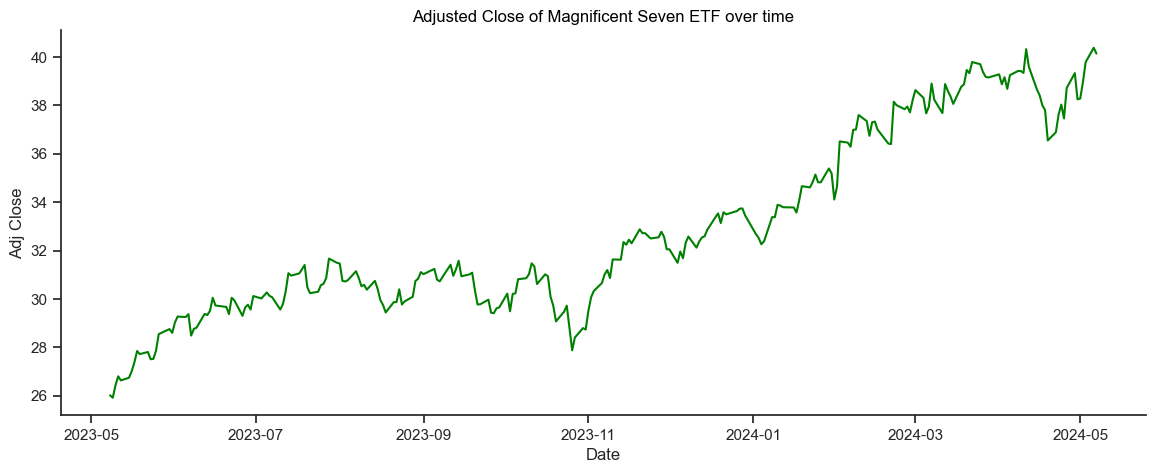

In [51]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=mag7_data, x="Date", y='Adj Close', color='green')
sns.despine()
plt.title("Adjusted Close of Magnificent Seven ETF over time", size='medium', color='black')

Below we describe our dataframe and that provides a concise statistical summary of the Magnificent Seven ETF's historical market data. It includes essential metrics like count, mean, standard deviation, minimum, maximum, and quartiles for the adjusted close prices. This summary offers quick insights into the distribution and characteristics of the ETF's performance, aiding in analysis and decision-making for investment strategies.

In [52]:
mag7_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,32.922198,33.137565,32.626996,32.883246,32.799048,8.489640e+04
std,3.693590,3.719679,3.598969,3.673012,3.726349,1.247571e+05
min,25.882000,26.129999,25.882000,26.030001,25.917496,5.000000e+02
25%,30.204999,30.288751,29.908249,30.172500,30.042091,4.375000e+03
50%,31.625000,31.835000,31.353500,31.604000,31.467403,3.140000e+04
75%,36.417500,36.697500,36.000000,36.429998,36.429998,1.306250e+05
max,40.450001,40.494400,40.030102,40.380001,40.380001,1.282400e+06


Downloading stock data for TSM (Taiwan Semiconductor Manufacturing Company) is motivated with the intention to explore its relationship with Nvidia's stock performance. This correlation investigation is particularly important because Nvidia sources its Graphics Processing Units (GPUs) from TSM. By analyzing the stock data of both companies, we aim to discern patterns, trends, and potential interactions between their respective stock prices. Understanding this relationship can offer valuable insights for our prediction since some weightage of the Magnificent Seven comes from Nvidia.

In [53]:
tsm_data = yf.download('TSM', period='1y')

[*********************100%%**********************]  1 of 1 completed

### Exploratory Data Analysis


Now that we have data that is ready to be used for analysis, we can start exploring this data to find high level relationships between the featuers of each dataset, and find comparisons between the different datasets we have chosen.

First, we want to check how the MAGS stock compares to the TSM stock. We can first start off by checking how different these two distributions are. We can accomplish this by using a two-sample T-test.

Our hypothesis are listed below:

*Null Hypothesis*: There is no significant difference between the average adjusted close prices of the MAGS and TSM stocks over the last year.

*Alternative Hypothesis*: The average adjusted close prices of the stocks MAGS and TSM significantly diverge from each other over the last year.

In [54]:
t_stat, p_value = scipy.stats.ttest_ind(mag7_data['Adj Close'], tsm_data['Adj Close'])
print("T-statistic:", t_stat)
print("P-Value: ", p_value)

T-statistic: -60.4826438729479
P-Value:  1.1466965483135344e-232


We reject the null hypothesis as the p-value is much less than 0.05, which is our significance level (alpha). Let's visualize this difference in distribution for both these stocks.

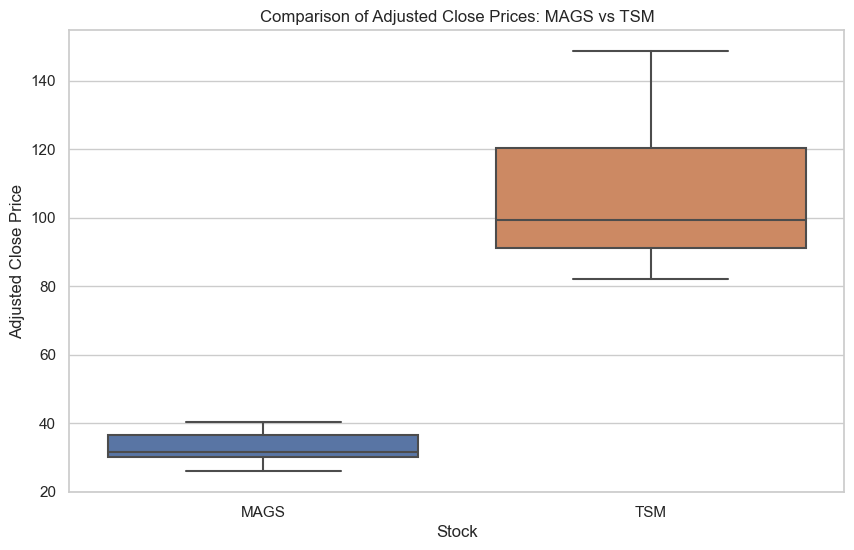

In [55]:
combined_data = pd.concat([mag7_data['Adj Close'], tsm_data['Adj Close']], axis=1)
combined_data.columns = ['MAGS', 'TSM']

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(data=combined_data)
plt.title('Comparison of Adjusted Close Prices: MAGS vs TSM')
plt.xlabel('Stock')
plt.ylabel('Adjusted Close Price')
plt.show()

The hypothesis test simply shows that there is a large difference in the valuation of each stock. To fully gain more insight, we can move on to a correlation between the stocks to see if their movement is similar. If they are correlated in their movement, the TSM stock can be a great feature to use, as we can track it to gain certain insights into the value of the Magnificent Seven ETF.

Next, we can move on to see instead how the trends of these two stocks correlate over the past year. Let's first visualize the trends of each of the stocks individually.

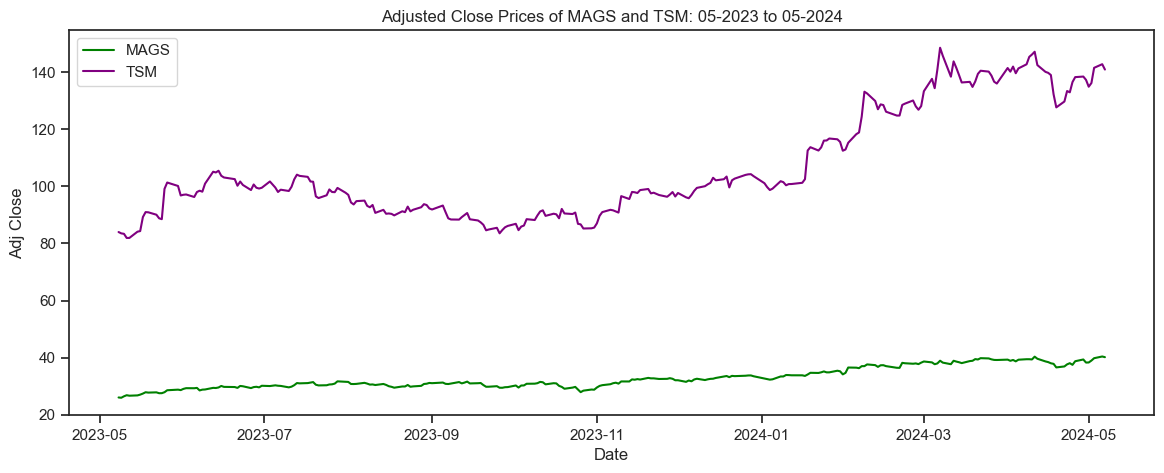

In [57]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize=(14,5))
    sns.set_style("ticks")
    sns.lineplot(data=mag7_data, x="Date", y='Adj Close', color='green', label='MAGS')
    sns.lineplot(data=tsm_data, x="Date", y='Adj Close', color='purple', label='TSM')
    plt.title('Adjusted Close Prices of MAGS and TSM: 05-2023 to 05-2024')
    plt.legend()
    plt.show()

By just looking at this graph, we cannot visually see much correlation between the two stocks. This may be because the adjusted close stock prices for TSM vary on a bigger range over the year than the MAGS adjusted close prices. Let's do a more in-depth analysis using Pearson's correlation coefficient to see the relationship between the adjusted close prices of both of the stocks.

Our hypothesis for this statistical test are listed below:

Null Hypothesis: There is no significant linear correlation between the adjusted close prices of MAGS and TSM stocks.

Alternative Hypothesis: There is a significant linear correlation between the adjusted close prices of MAGS and TSM stocks.

Pearson's correlation coefficient: 0.9396838885913295


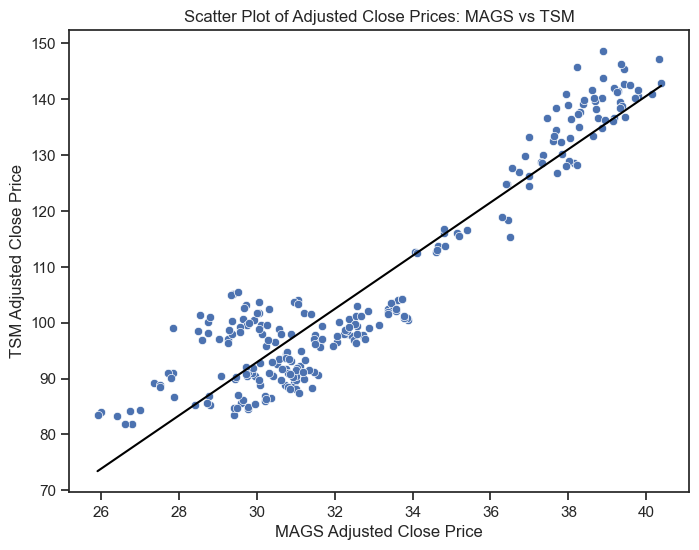

In [60]:
mags_close = mag7_data['Adj Close']
tsm_close = tsm_data['Adj Close']

correlation = np.corrcoef(mags_close, tsm_close)[0, 1]
print("Pearson's correlation coefficient:", correlation)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=mags_close, y=tsm_close)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(mags_close, tsm_close)
x_values = np.linspace(min(mags_close), max(mags_close), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='black', label=f'Linear Regression (R={correlation:.2f})')
plt.title('Scatter Plot of Adjusted Close Prices: MAGS vs TSM')
plt.xlabel('MAGS Adjusted Close Price')
plt.ylabel('TSM Adjusted Close Price')
plt.show()

### Primary Analysis

Choose a machine learning technique to hlep answer the questions


### Visualization

Add at least one plot (labeled with legend) and explained.

### Insights and Conclusions